# 참고자료
https://wikidocs.net/231573 [전반적인 내용 study하기 좋은 자료]<br>
https://wikidocs.net/234016 [fine-grained한 문법을 잘 설명해놨음]<br>
https://wikidocs.net/166787 [HuggingFace의 전반적인 설명]<br>
[Task 수행 code]<br>
https://dacon.io/competitions/official/236216/codeshare/9631?page=1&dtype=recent

In [1]:
import os

In [2]:
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

In [3]:
import pandas as pd
train = pd.read_csv("train.csv")
# what is itertools.product?
# -> itertools.product는 두개 이상의 리스트(or 집합) 끼리의
# cartesian product를 계산해 iterator로 반환
from itertools import product
list(product([f"질문_{x}"for x in range(1,3)],[f"답변_{x}"for x in range(1,6)]))

[('질문_1', '답변_1'),
 ('질문_1', '답변_2'),
 ('질문_1', '답변_3'),
 ('질문_1', '답변_4'),
 ('질문_1', '답변_5'),
 ('질문_2', '답변_1'),
 ('질문_2', '답변_2'),
 ('질문_2', '답변_3'),
 ('질문_2', '답변_4'),
 ('질문_2', '답변_5')]

In [4]:
train

,id,질문_1,질문_2,category,답변_1,답변_2,답변_3,답변_4,답변_5
0,TRAIN_000,면진장치가 뭐야?,면진장치에 사용되는 주요 기술은 무엇인가요?,건축구조,면진장치란 지반에서 오는 진동 에너지를 흡수하여 건물에 주는 진동을 줄여주는 진동 ...,"면진장치란 건물의 지반에서 발생하는 진동 에너지를 흡수하여 건물을 보호하고, 진동을...",면진장치란 지반으로부터 발생하는 진동 에너지를 흡수하여 건물에 전달되는 진동을 줄여...,면진장치는 건물의 지반으로부터 오는 진동 에너지를 흡수하여 건물에 전달되는 진동을 ...,면진장치는 건물에 오는 지반 진동의 영향을 최대한으로 흡수하여 건물에 전달되는 진동...
1,TRAIN_001,내진설계의 종류 좀 알려줘,내진설계에는 어떤 종류가 있는지 자세히 알려주실 수 있나요?,건축구조,"내진 설계의 종류로 내진구조, 제진구조, 면진구조가 있습니다.","내진설계에는 내진구조, 제진구조, 면진구조가 있습니다. 내진구조는 건물 구조물이 지...","내진설계에는 주로 내진구조, 제진구조, 면진구조의 세 가지 종류가 있습니다. 이들은...","내진설계에는 주로 내진구조, 제진구조, 면진구조가 사용됩니다. 내진구조는 건물 구조...","내진 설계에는 다양한 종류가 있지만, 대표적으로 내진구조, 제진구조, 면진구조가 있..."
2,TRAIN_002,철골구조의 장점이 뭐야?,철골구조의 장점을 알려줘?,건축구조,철골구조는 건물의 외벽에는 그다지 하중이 걸리지 않기 때문에 고층 건물의 건축이 가...,철골구조의 장점은 건물의 외벽에는 그다지 하중이 걸리지 않기 때문에 고층 건물의 건...,철골구조의 장점은 건물의 외벽에 하중이 적게 걸리기 때문에 고층 건물의 건축이 용이...,"철골구조의 장점은 건물의 외벽이 하중이 걸리지 않아 공간 활용이 용이하고, 고층 건...",철골구조의 장점은 건물의 외벽에 하중이 크게 걸리지 않아 고층 건물을 건축할 수 있...
3,TRAIN_003,철골철근 콘크리트 구조가 뭐야?,철골철근 콘크리트 구조의 장점과 단점에는 무엇이 있을까요?,건축구조,"철근철골콘크리트는 철골과 철근, 그리고 콘크리트를 함께 사용하는 건축 구조입니다. ...","철골철근콘크리트 구조는 건축물을 지탱하는 주요 구조물인 철골과 철근, 그리고 콘크리...",철골철근 콘크리트 구조는 건축물을 지탱하기 위한 구조물에서 일반적으로 사용되는 방식...,"철골철근콘크리트 구조는 철골과 철근, 그리고 콘크리트를 함께 사용하여 만들어지는 건...","철골철근 콘크리트 구조는 강철 골조와 강철 철근, 그리고 콘크리트를 함께 사용하여 ..."
4,TRAIN_004,철골구조는 어떤 방식이 있어?,철골구조의 다양한 방식이 무엇인가요?,건축구조,철골구조는 일반철골구조와 경량철골구조가 있습니다.,철골구조는 일반철골구조와 경량철골구조가 있습니다. 일반철골구조는 주로 대형 건물이나...,철골구조는 주로 일반철골구조와 경량철골구조로 나뉘어집니다. 이들은 건축 시스템에 따...,철골구조는 주로 일반철골구조와 경량철골구조로 구분됩니다. 이외에도 최근에는 고층 건...,철골구조는 일반철골구조와 경량철골구조 두 가지 방식이 주로 사용됩니다. 일반철골구조...
...,...,...,...,...,...,...,...,...,...
639,TRAIN_639,벽장 부위 결로의 원인이 뭐야?,벽장 부위 결로가 발생하는 주된 원인은 무엇일까요?,타 마감하자,벽장 부위 결로의 원인은 난방이 이웃한 방과동일한 조건이 되나 그 방에 비해 저온인...,"벽장 부위 결로의 원인은 주로 난방이 자리잡은 방이 내부 온도가 낮은 반면, 외부 ...",벽장 부위 결로가 발생하는 원인은 난방이 잘 이루어지지 않아 해당 공간이 저온인 반...,"벽장 부위 결로가 발생하는 원인은 난방이 인접한 방과 같은 조건을 갖추고 있지만, ...",벽장 부위 결로의 주된 원인은 충분한 환기가 이루어지지 않는 환경과 과도한 습기가 ...
640,TRAIN_640,"AD, PD에 면한 벽체 결로의 원인이 뭐야?",벽체 결로가 AD나 PD에 면한다면 그 원인이 무엇인가요?,타 마감하자,"AD, PD에 면한 벽체 결로의 원인은 외기에 접하는 면 좌, 우측 벽체에는 단열재...","AD, PD에 면한 벽체 결로의 원인은 외기에 접하는 면 좌, 우측 벽체에는 단열재...","AD, PD에 면한 벽체 결로의 주된 원인은 외기에 접하는 면 좌, 우측 벽체에 단...","AD, PD에 면한 벽체 결로의 원인으로는 외기에 접하는 면 좌, 우측 벽체는 일반...","AD, PD에 면한 벽체 결로의 원인으로는 외부 공기에 노출된 벽면이 실내보다 냉각..."
641,TRAIN_641,외벽 모서리 부위에 결로가 발생하는 원인이 뭐야?,외벽 모서리 부위에 결로가 발생하는 것을 예방하는 방법이 있을까요?,타 마감하자,외벽모서리 부위에 결로가 발생하는 원인은 높은 온도차 때문입니다. 외벽 모서리의 경...,외벽 모서리 부위에 결로가 발생하는 원인은 중요한 역할을 합니다. 외부에 비치는 세...,외벽 모서리 부위에 결로가 발생하는 원인으로는 높은 온도차가 대표적입니다. 외벽 모...,외벽 모서리 부위에 결로가 발생하는 원인은 실내와 외부의 온도차 때문입니다. 외벽 ...,외벽 모서리 부위에 결로가 발생하는 주요 원인은 높은 온도차입니다. 외벽 모서리는 ...
642,TRAIN_642,창호 결로의 대책은 뭐야?,창호 결로를 해결하기 위한 가장 효과적인 방법은 무엇인가요?,타 마감하자,창호결로의 대책은 제품을 선정할 때 KS에 규정된 프레임을 선정하고 유리의 열관류율...,창호 결로의 대책은 KS에 규정된 프레임을 선정하고 유리의 열관류율 및 결로 발생 ...,"창호 결로를 예방하기 위한 대책은 KS에 규정된 프레임을 선택하고, 열관류율이 적은...","창호 결로의 대책은 여러 가지가 있습니다. 먼저, 창호를 선택할 때 KS에 규정된 ...","창호 결로를 방지하기 위한 대책으로는 KS에 규정된 프레임을 사용하고, 열관류율 및..."


In [5]:
train_data = []
# at <-> pandas dataframe loc
# lat <-> pandas dataframe iloc
## 각각이 유사한 역할을 수행하는데, at과 lat는 하나의 value에 접근하는데 특화돼있다.
for q,a in list(product([f"질문_{x}"for x in range(1,3)],[f"답변_{x}"for x in range(1,6)])):
  for i in range(len(train)):
    train_data.append(
        "질문:"+train.at[i,q] + "답변:"+train.at[i,a]
    )

In [6]:
train_data

['질문:면진장치가 뭐야?답변:면진장치란 지반에서 오는 진동 에너지를 흡수하여 건물에 주는 진동을 줄여주는 진동 격리장치입니다.',
 '질문:내진설계의 종류 좀 알려줘답변:내진 설계의 종류로 내진구조, 제진구조, 면진구조가 있습니다.',
 '질문:철골구조의 장점이 뭐야?답변:철골구조는 건물의 외벽에는 그다지 하중이 걸리지 않기 때문에 고층 건물의 건축이 가능한 것이 장점입니다.',
 '질문:철골철근 콘크리트 구조가 뭐야?답변:철근철골콘크리트는 철골과 철근, 그리고 콘크리트를 함께 사용하는 건축 구조입니다. 철골은 강하고 가벼운 소재로, 높은 내구성과 강도를 가지고 있어 대규모 공간이나 강성이 요구되는 대형 고층건물에 적합합니다. 그러나 화재에 취약하고 녹이 슬면 강성이 떨어지는 단점이 있습니다. 이를 보완하기 위해 철근과 콘크리트를 섞어 사용하는 방식이 개발되었습니다. 철근콘크리트는 철근이 인장력을, 콘크리트가 압축력을 담당하여 강성을 가지며 콘크리트의 열전도가 낮은 재료상 특징을 이용해 서로의 단점을 보완하도록 결합한 구조입니다. 내화성, 내구성, 내진성능이 뛰어나지만 자중이 크고 시공과정이 복잡하며 공사기간이 길고 균일한 시공이 불가능하다는 단점이 있습니다. 철근철골콘크리트는 이 두 가지 구조의 장점을 살려 만든 것으로, 철골 뼈대로 구조를 세우고 그 주변을 철근과 콘크리트로 감싸거나, 철근과 콘크리트로 구조를 만들고 그 위에 철골을 올리는 형태로 만들어집니다. 이렇게 함으로써 철골의 내구성과 강도를 높이면서도 화재에 대한 안전성을 높일 수 있습니다.',
 '질문:철골구조는 어떤 방식이 있어?답변:철골구조는 일반철골구조와 경량철골구조가 있습니다.',
 '질문:커튼월이 뭐야?답변:커튼월은 건물의 하중을 모두 기중, 들보, 바닥, 지붕으로 지탱하고, 외벽은 하중을 부담하지 않은 채 마치 커튼을 치듯 건축자재를 돌려쳐 외벽으로 삼는 건축 양식이다.',
 '질문:내진구조가 뭐야?답변:내진구조란 강한 규모의 지진파에도 건축물의 구조나 시설물들이 붕괴되지 않도록 철근

In [7]:
# 질문,답변이 하나의 리스트에 모두 담김
# RAG(Retrieval-Augmented Generation for Knowledge-Intensive NLP Tasks)의 문서를 만드는 작업
len(train_data)

6440

In [8]:
pd.DataFrame(train_data).to_csv("train_data.csv",index = False, encoding = 'utf-8')

In [9]:
from langchain_community.document_loaders.csv_loader import CSVLoader

In [10]:
loader = CSVLoader(file_path = 'train_data.csv',encoding = 'utf-8')
data = loader.load()

## distiluse-base-multilingual-cased-v1
This is a sentence-transformers model: It maps sentences & paragraphs to a 512 dimensional dense vector space and can be used for tasks like clustering or semantic search.

### [sentence_transformer](https://huggingface.co/sentence-transformers/distiluse-base-multilingual-cased-v1)

In [11]:
from langchain_community.embeddings import HuggingFaceEmbeddings
modelPath = "distiluse-base-multilingual-cased-v1"

model_kwargs = {'device':'cuda'}

encode_kwargs = {'normalize_embeddings':False}

# HuggingFaceEmbeddings 클래스는 Hugging Face의 트랜스포머 모델을 사용해 문서 또는 문장을 임베딩 하는데 사용된다.
# model_name ; 사용할 hugginface model 설정
# model_kwargs : 모델이 실행될 환경 설정
# encode_kwargs : 임베딩 정규화 설정 ; 이를 통해 모든 벡터가 같은 범위의 값을 갖도록 한다.
# 이는 유사도 계산 시 일관성을 높여준다.
embeddings = HuggingFaceEmbeddings(
    model_name = modelPath,
    model_kwargs = model_kwargs,
    encode_kwargs = encode_kwargs
)

/home/sjlee/miniconda3/envs/sj_virtual/lib/python3.8/site-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 0.3.0. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFaceEmbeddings`.
  warn_deprecated(
/home/sjlee/miniconda3/envs/sj_virtual/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
 # what is FAISS?
 # Facebook AI Similarity Search(FAISS)는 Dense Vector의 효율적인 유사도 검색과 클러스터링을 위한 라이브러리이다.
 # FAISS는 Semantic Search를 도와주는 라이브러리이다.
 ## Semantic Search란?
 ## -> 사용자의 질의(query)를 단순한 키워드 매칭을 넘어서 그 의미를 파악해 관련된 결과를 반환하는 검색 방식이다.
 ### --> 위의 내용을 종합해봤을때, Transformer를 이용해 Semantic한 정보를 담은 Dense Vector가 추출되고, 이를 효율적으로 유사도 matching
 ### --> 해주는 Tool이라고 생각하면 된다.
from langchain.vectorstores import FAISS

In [13]:
# from_documents FAISS(another e.g. Chroma)를 통해 유사도 검색을 할 수 있도록 vector저장소를 설정 하는 과정
db = FAISS.from_documents(data, embedding = embeddings)

In [14]:
# db를 특정 경로에 저장해둠
# db 폴더 안에 index.faiss, index.pkl 파일이 생기는 것을 볼 수 있다.
db.save_local("db/faiss_index")

In [15]:
# 참고 자료에서는, 이전에 vector 저장소를 다시한번 불러오는 과정을 거쳤는데, 
# 그 과정은 생략해도 될 것 같아서 생략.
# 역직렬화(deserialization)과정에서 악성코드가 존재할 수 있으므로 Error 발생
# allow_dangerous_deserialization = True로 설정
db = FAISS.load_local("db/faiss_index",embeddings,allow_dangerous_deserialization=True)

In [16]:
# as_retriever 메소드를 이용해 retriever 객체를 반환
# search_kwargs
## k <-> 가장 관련성이 높은 몇개의 결과를 반환할 것인가?
## score_threshold <-> 유사도 점수 얼마 이상의 문서만 반환할 것인가?
retriever = db.as_retriever(search_kwargs = {"k":4})

In [17]:
import torch
device = 'cuda:0' if torch.cuda.is_available() else "cpu"

## pipeline의 역할 
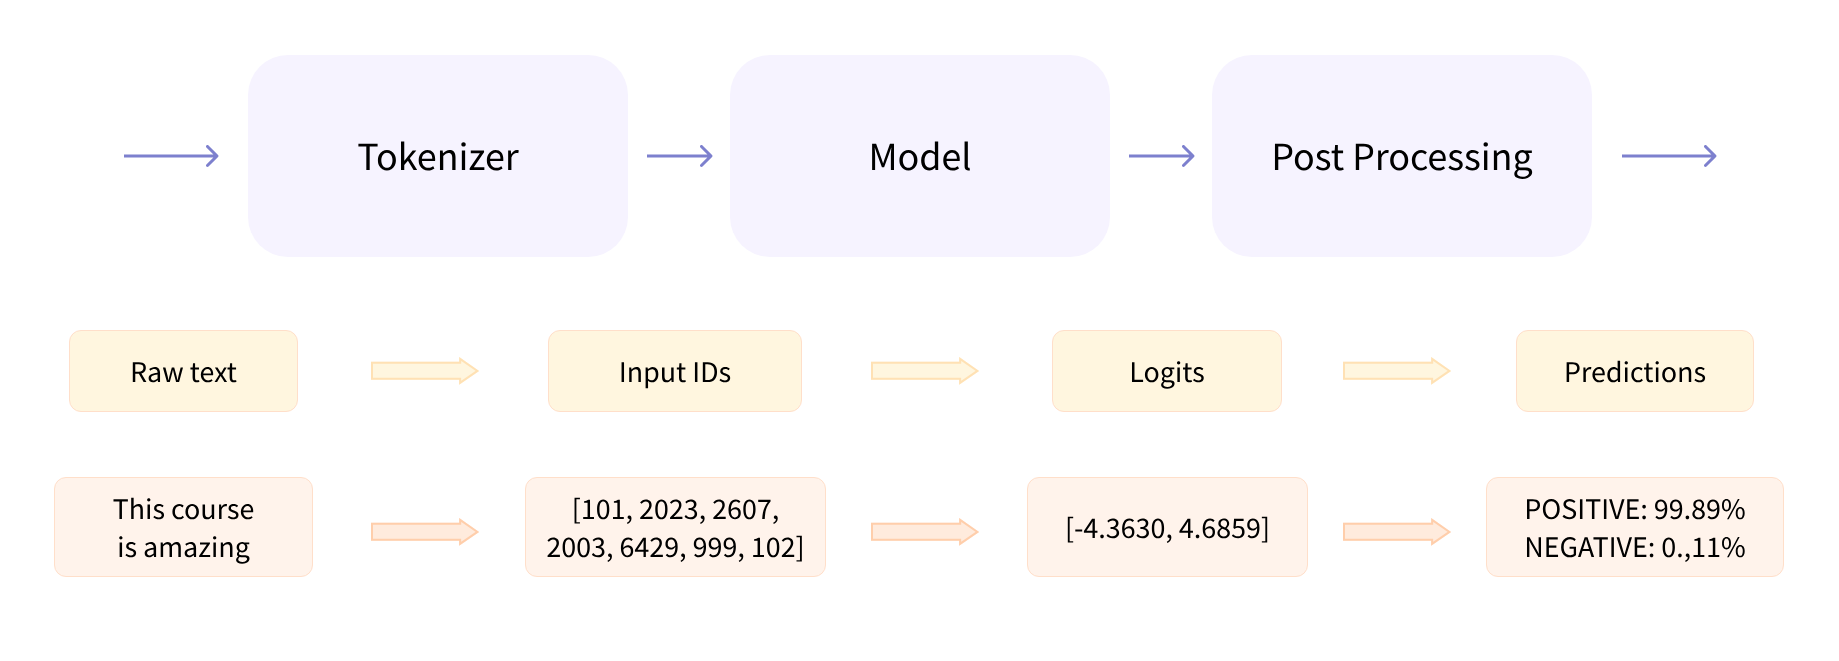

In [18]:
from langchain_community.llms.huggingface_pipeline import HuggingFacePipeline
from transformers import GPT2LMHeadModel,AutoTokenizer,pipeline
# GPU 사용의 제한으로 실제로 사용한 7B Llama 사용 불가능
# 한국어를 처리하기 위해 skt의 kogpt 사용
# 125M parameter nums
# pipeline은 text의 tokenize, forward, post processing을 한번에 처리한다.
# pipeline은 hugging face의 모든 모델을 사용할 수 있지만, strict한 조건이 주어질때는 좋지 않다.
model_id = "skt/kogpt2-base-v2"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = GPT2LMHeadModel.from_pretrained(model_id)
pipe = pipeline("text-generation",model = model, tokenizer = tokenizer, max_new_tokens=100,device=device)
hf = HuggingFacePipeline(pipeline = pipe)

/home/sjlee/miniconda3/envs/sj_virtual/lib/python3.8/site-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The class `HuggingFacePipeline` was deprecated in LangChain 0.0.37 and will be removed in 0.3. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFacePipeline`.
  warn_deprecated(


### RAG with LCEL(LangChain Expression Language)
LangChain은 복잡한 chain을 쉽게 구현할 수 있도록 LCEL을 제공한다.<br>
Runnable Interface를 갖는 LangChain의 객체들은 invoke, batch, stream등의 메소드를 갖고 있고,<br>
이 각각의 객체들을 pipe operator `|`로 연결하여 하나의 Chain을 구성한다. 
이때 연결된 객체들은 앞 객체의 output을 다음객체의 Input으로 받아야 한다.

#### invoke
입력에 대해 chain을 호출한다. 이경우는 단일 chain
#### streaming
모델의 사이즈가 크거나 프롬프트가 클 때 응답시간이 느릴 수 있는데, Invoke처럼 이 응답을 모두 기다렸다가 결과를 출력하는데<br>
시간이 많이 소요될 수 있기 때문에 LangChain은 스트리밍 패턴을 지원한다. 이는 응답이 생성되는대로 스트리밍으로 응답을 실시간 리턴할 수 있다.
#### batch
여러개의 질문이나 명령을 내려야 하는 경우, 루프를 도는 것이 아니라, 리스트에 프롬프트 목록을 저장하고 batch 호출을 통해서 여러 질문을 처리할 수 있다.

In [19]:
from langchain_core.prompts import PromptTemplate
# 위에서 작성한 문자열을 PromptTemplate 클래스로 만들어 context와 question등의 부분을 채우고 
# 새로운 Prompt와 합치는등의 작업을 수행할 수 있다.
# .from_template : 문자열을 PromptTemplate Instance로 생성
# .format(context = "~~", question = "~~") : 템플릿을 채워서 프롬프트를 구성

template = """마지막에 질문에 답하려면 다음과 같은 맥락을 사용합니다.

{context}

질문: {question}

유용한 답변:"""

custom_rag_prompt = PromptTemplate.from_template(template)
custom_rag_prompt.invoke({"context":"Apple is sweet.","question" : "How apple taste?"})

StringPromptValue(text='마지막에 질문에 답하려면 다음과 같은 맥락을 사용합니다.\n\nApple is sweet.\n\n질문: How apple taste?\n\n유용한 답변:')

In [20]:
from langchain_core.prompts import PromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser


MAX_TOKENS = 800

def format_docs(docs):
    # 문서 내용 연결
    joined_docs = "\n\n".join(doc.page_content for doc in docs)
    # 토큰 길이가 MAX_TOKENS를 초과하는 경우 자르기
    tokens = tokenizer.encode(joined_docs, return_tensors='pt')
    if tokens.shape[1] > MAX_TOKENS:
        tokens = tokens[:, :MAX_TOKENS]
        joined_docs = tokenizer.decode(tokens[0], skip_special_tokens=True)
    return joined_docs

template = """마지막에 질문에 답하려면 다음과 같은 맥락을 사용합니다.

{context}

질문: {question}

유용한 답변:"""

custom_rag_prompt = PromptTemplate.from_template(template)

rag_chain = (
    # retriever로 검색된 문서들(4개)을 format_docs를 통해서 "\n\n"으로 join한다.
    # RunnablePassthrough() : 입력된 값을 그대로 전달한다.
    # 결과적으로 첫번째 Chain에서는 {"context" : format_docs, "question" : 질문}의 형태
    # dictionary가 다음 chain의 input으로 들어간다.
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    # custom_rag_prompt가 딕셔너리를 받아 완성된 prompt 문자열을 생성한다.
    | custom_rag_prompt
    # 모델 Pipeline의 문자열을 넣는다.
    | hf
    # 모델의 출력(생성된 텍스트)를 사람이 읽을 수 있는 문자열 형태로 Parsing한다.
    | StrOutputParser()
)


In [21]:
# GPT Neo에 한글을 넣으려니 차원 문제가 발생
# 도배지에 녹은 자국이 발생하는 주된 원인과 그 해결 방법은 무엇인가요?
# -> 대체: 위의 Cell에서 KoGPT 사용
## Note> 작은 모델을 사용하기 때문에 생성 가능한 token의 개수의 한계가 발생, pipeline의 max_new_tokens를 조절
## Note2> print의 flush=True를 이용해서 출력버퍼를 강제로 비운다.
tmp_list = []
for chunk in rag_chain.stream("도배지에 녹은 자국이 발생하는 주된 원인과 그 해결 방법은 무엇인가요?"):
    tmp_list.append(chunk) 
    print(chunk, end = "",flush = True)

마지막에 질문에 답하려면 다음과 같은 맥락을 사용합니다.

0: 질문:도배지에 녹이 묻어나오면 어떻게 처리해야 하나요?답변:도배지에 녹이 묻어나오는 것은 녹오염으로, 도배지 상에 녹색 또는 갈색의 녹이 발생하는 현상을 의미합니다. 이러한 현상이 발생하는 원인, 책임 소재 및 해결 방법은 다음과 같습니다.  1. 습도 문제 원인: 높은 습도로 인해 도배지 안쪽의 금속 물질이 산화되어 녹이 도배지에 발생할 수 있습니다. 책임 소재: 건물의 소유자나 거주자가 습기 관리의 책임이 있습니다. 해결 방법: 제습기를 가동하거나 실내의 적정 습도를 유지하기 위해 환기를 통해 습기를 제거하는 것이 중요합니다. 전문가의 도움을 받아 보수 작업을 권장합니다.  2. 누수 원인: 누수로 도배지가 젖어 있는 상태가 계속되면 곰팡이와 녹이 발생할 수 있습니다. 책임 소재: 누수 문제는 건물의 소유자나 거주자의 관리 책임이 있습니다. 해결 방법: 누수를 해결하고 곰팡이와 녹이 발생한 부분 및 전체 도배지를 교체하는 보수 작업이 필요합니다. 이러한 작업은 전문가의 도움을 받는 것이 좋습니다.

0: 질문:도배지에 녹이 묻어나오면 어떻게 처리해야 하나요?답변:도배지에 녹이 묻어나오는 현상은 녹 오염으로 도배지에 붉은색의 녹이 베어나오는 것을 말합니다. 이 현상은 보통 높은 습도나 누수로 인해 발생할 수 있습니다.  고습한 환경에서는 도배지 안쪽의 금속이 누수되어 녹이 생기며, 이로 인해 도배지에 녹오염이 발생할 수 있습니다. 따라서 공간 내 습도를 적정하게 유지하기 위해 제습기를 가동하고, 환기를 통해 습도를 조절하는 것이 필요합니다. 또한, 도배지 주변의 누수를 조사하고 보수하는 것이 중요합니다.  만일 누수로 인해 도배지가 젖어서 곰팡이가 발생하게 된다면, 녹오염 뿐만 아니라 곰팡이까지 발생할 수 있습니다. 따라서 이때는 누수 부분을 보수하고, 곰팡이가 발생한 도배지의 부분 또는 전체를 교체하는 것이 필요합니다. 이러한 작업은 전문가의 도움을 받는 것이 좋습니다.   따라서, 도배지에 

In [22]:
#이경우는 대답이 짧기에, length =1
len(tmp_list)

1

#### test set 예측

In [23]:
test = pd.read_csv("test.csv")
test

,id,질문
0,TEST_000,"방청 페인트의 종류에는 어떤 것들이 있는지 알고 계신가요? 또한, 원목사이딩을 사용..."
1,TEST_001,도배지에 녹은 자국이 발생하는 주된 원인과 그 해결 방법은 무엇인가요?
2,TEST_002,"큐블럭의 단점을 알려주세요. 또한, 압출법 단열판을 사용하는 것의 장점은 무엇인가요?"
3,TEST_003,"철골구조를 사용하는 고층 건물에서, 단열 효과를 높이기 위한 시공 방법은 무엇이 있..."
4,TEST_004,도배지의 완전한 건조를 위해 몇 주 동안 기다려야 하나요?
...,...,...
125,TEST_125,분말 소화기를 사용할 때 주의해야 할 사항은 무엇인가요? 그리고 아파트 도배 평수를...
126,TEST_126,"압출법 보온판의 가장 큰 장점은 무엇인가요?"""
127,TEST_127,평지붕의 누수 문제를 방지하기 위해 수성 벽체용 탄성 방수 도료를 사용하는 것이 어...
128,TEST_128,석고수정이 발생하는 가장 큰 원인은 무엇인가요? 그리고 이를 해결하는 방법에 대해 ...


In [24]:
length = test['질문'].apply(lambda x : len(x))
max(length)
    

88

In [25]:
# Task를 완료하기에, 모델이 너무 작음
from tqdm import tqdm
result = []

for i in tqdm(range(len(test))):
  _id = test.at[i,'id']
  _q = test.at[i,'질문']
  _a = []
  for chunk in rag_chain.stream(_q):
      _a.append(chunk)
      if i<5: 
          print(chunk, end="", flush=True)
  result.append(
      {
          "id":_id,
          "대답":" ".join(_a)
      }
  )

  0%|          | 0/130 [00:00<?, ?it/s]

마지막에 질문에 답하려면 다음과 같은 맥락을 사용합니다.

0: 질문:어떤 표면에 사용할 페인트가 있는지 알고 싶은데, 어떤 종류가 있나요?답변:페인트의 종류로는 주로 수성페인트, 유성페인트, 천연페인트 등이 사용됩니다. 각각의 종류는 사용 용도와 특성에 따라 다양하게 활용됩니다. 여기에 추가적으로 각 페인트의 장단점과 주로 사용되는 공간이나 재료에 대해 알려드리겠습니다.

0: 질문:페인트의 종류는 어떤 성분에 따라 다르나요?답변:성분에 따른 페인트 종류로는 주로 우레탄 계열, 에폭시 계열, 에나멜 계열, 아크릴 계열 등이 있습니다. 이러한 종류의 페인트는 사용되는 장소나 목적에 따라 선택되며, 각각의 특성과 용도에 대해 더 자세히 알아보시는 것이 좋습니다.

0: 질문:방청 페인트의 종류는 뭐가 있어?답변:방청 페인트는 다양한 종류로 분류됩니다. 그 종류에는 광명단 페인트, 방청산화철 페인트, 알루미늄 페인트, 역청질 페인트, 워시 프라이머, 크롬산아연 페인트, 규산염 페인트 등이 있습니다. 이러한 다양한 종류의 방청 페인트가 각자의 특성과 용도에 맞게 사용됩니다.

0: 질문:방청 페인트를 선택할 때 고려해야 하는 다양한 종류가 있나요?답변:방청 페인트는 다양한 종류로 분류됩니다. 그 종류에는 광명단 페인트, 방청산화철 페인트, 알루미늄 페인트, 역청질 페인트, 워시 프라이머, 크롬산아연 페인트, 규산염 페인트 등이 있습니다. 이러한 다양한 종류의 방청 페인트가 각자의 특성과 용도에 맞게 사용됩니다.

질문: 방청 페인트의 종류에는 어떤 것들이 있는지 알고 계신가요? 또한, 원목사이딩을 사용하는 것에 어떤 단점이 있을까요?

유용한 답변:방청 페인트는 여러 종류가 있습니다.
질문:방청 페인트를 선택할 때 고려해 보시기 바랍니다.
질문:방청 페인트가 방청 방수나 방청 기능을 가지고 있지는 않습니까?
질문:방청 페인트는 방청시 방수이나 방청 기능을 가지고 있지 않습니까?
질문:방청 페인트가 방수이나 방청 기능이라는 장점이 없는 이유는 두 가지 이유 때문입니다

  1%|          | 1/130 [00:01<03:16,  1.52s/it]

마지막에 질문에 답하려면 다음과 같은 맥락을 사용합니다.

0: 질문:도배지에 녹이 묻어나오면 어떻게 처리해야 하나요?답변:도배지에 녹이 묻어나오는 것은 녹오염으로, 도배지 상에 녹색 또는 갈색의 녹이 발생하는 현상을 의미합니다. 이러한 현상이 발생하는 원인, 책임 소재 및 해결 방법은 다음과 같습니다.  1. 습도 문제 원인: 높은 습도로 인해 도배지 안쪽의 금속 물질이 산화되어 녹이 도배지에 발생할 수 있습니다. 책임 소재: 건물의 소유자나 거주자가 습기 관리의 책임이 있습니다. 해결 방법: 제습기를 가동하거나 실내의 적정 습도를 유지하기 위해 환기를 통해 습기를 제거하는 것이 중요합니다. 전문가의 도움을 받아 보수 작업을 권장합니다.  2. 누수 원인: 누수로 도배지가 젖어 있는 상태가 계속되면 곰팡이와 녹이 발생할 수 있습니다. 책임 소재: 누수 문제는 건물의 소유자나 거주자의 관리 책임이 있습니다. 해결 방법: 누수를 해결하고 곰팡이와 녹이 발생한 부분 및 전체 도배지를 교체하는 보수 작업이 필요합니다. 이러한 작업은 전문가의 도움을 받는 것이 좋습니다.

0: 질문:도배지에 녹이 묻어나오면 어떻게 처리해야 하나요?답변:도배지에 녹이 묻어나오는 현상은 녹 오염으로 도배지에 붉은색의 녹이 베어나오는 것을 말합니다. 이 현상은 보통 높은 습도나 누수로 인해 발생할 수 있습니다.  고습한 환경에서는 도배지 안쪽의 금속이 누수되어 녹이 생기며, 이로 인해 도배지에 녹오염이 발생할 수 있습니다. 따라서 공간 내 습도를 적정하게 유지하기 위해 제습기를 가동하고, 환기를 통해 습도를 조절하는 것이 필요합니다. 또한, 도배지 주변의 누수를 조사하고 보수하는 것이 중요합니다.  만일 누수로 인해 도배지가 젖어서 곰팡이가 발생하게 된다면, 녹오염 뿐만 아니라 곰팡이까지 발생할 수 있습니다. 따라서 이때는 누수 부분을 보수하고, 곰팡이가 발생한 도배지의 부분 또는 전체를 교체하는 것이 필요합니다. 이러한 작업은 전문가의 도움을 받는 것이 좋습니다.   따라서, 도배지에 

  2%|▏         | 2/130 [00:03<03:15,  1.52s/it]

마지막에 질문에 답하려면 다음과 같은 맥락을 사용합니다.

0: 질문:압출법 단열판을 사용할 때 어떤 단점이 있을까요?답변:압출법단열판은 시간이 지나면 단열 성능이 떨어지는 경시 현상이 있고, 비드법 단열재에 비해 가격이 비쌀 뿐 아니라 충격에 약해서 파손율이 높은 편입니다. 이러한 이유로 압출법단열판은 강점이 있을 뿐 아니라 위와 같은 단점이 있다고 볼 수 있습니다.

0: 질문:압출법단열판을 사용하는 것의 주요 장점은 무엇인가요?답변:압출법단열판의 장점은 습기에 강하고 곰팡이 및 세균 증식을 막을 수 있는 것입니다. 또한, 단열재 중에서는 열전도율이 가장 낮으며 시공이 간편하다는 점도 장점으로 꼽힙니다. 추가로 압출법단열판은 가벼워서 운반이 용이하고 내구성이 뛰어나다는 점도 많은 사용자들에게 긍정적인 평가를 받고 있습니다.

0: 질문:압출법 단열판을 사용할 때 어떤 단점이 있을까요?답변:압출법단열판은 시간이 지나면 단열 성능이 떨어지는 경시현상이 있는 것이 주요한 단점입니다. 또한, 비드법 단열재에 비해 가격이 상대적으로 높고 충격에 약해서 파손율이 높은 편이기도 합니다. 때문에 장기적인 성능과 내구성 측면에서 고려가 필요한 제품이라고 할 수 있습니다.

0: 질문:압출법단열판을 사용하는 것의 주요 장점은 무엇인가요?답변:압출법 단열판은 습기에 강하고 곰팡이 및 세균 증식을 막아 주는 동시에 단열재 중 열전도율이 가장 낮은 편입니다. 또한 시공이 간편하고 가볍기 때문에 건축물 내부의 단열 및 보온에 매우 효과적입니다. 추가로 비싼 가격이 아니며 내화성과 방음효과도 좋다는 장점도 있습니다.

질문: 큐블럭의 단점을 알려주세요. 또한, 압출법 단열판을 사용하는 것의 장점은 무엇인가요?

유용한 답변:압출법단열판을 사용하는 방법에 대해 어떻게 생각하세요? 질문:압출법 단열판을 사용하는 것이 비용과 수명 측면에서 유리하기 때문이다. 가장 쉽게 설명되는 것은 압출법단열판을 사용하는 것과 큐블럭을 사용하는 것의 차이는 어떤 것이냐는 것이다. 가격이 비싸고 품질이 떨

  2%|▏         | 3/130 [00:04<03:16,  1.55s/it]

마지막에 질문에 답하려면 다음과 같은 맥락을 사용합니다.

0: 질문:내단열 시공을 하는 것의 장점은 무엇인가요?답변:내단열 시공의 장점은 실내에서의 작업으로 인해 날씨의 영향을 덜 받는다는 것입니다. 또한 공사비, 재료비, 그리고 인건비가 적게 들어가며 외부 벽체와 직접 닿지 않기 때문에 열교 현상을 줄일 수 있다는 점도 있습니다. 이러한 이유들로 내단열 시공은 매우 경제적이고 효율적인 방법이라 할 수 있습니다.

0: 질문:철골구조는 어떤 방식이 있어?답변:철골구조는 주로 일반철골구조와 경량철골구조로 구분됩니다. 이외에도 최근에는 고층 건물에서 사용되는 초고층철골구조나 환경 친화적인 재료를 사용하는 친환경철골구조 등 다양한 방식이 제안되고 연구되고 있습니다.

0: 질문:철근콘크리트 구조의 특징과 장점은 무엇인가요?답변:철근콘크리트구조는 일반적으로 도심에서 가장 많이 이용하는 구조 중 하나입니다. 콘크리트의 인장응력의 약점을 철근으로 보완한 구조로 내구성이나 내화, 내진의 성능은 좋으나 강도에 비해서 자중이 커 중, 고층의 건물에서는 그 하중을 지지하기 위해 아래층의 보나 기둥의 단면이 커야 하는 문제가 있다.

0: 질문:외단열은 무엇을 의미하나요?답변:외단열은 건물의 콘크리트 골조와 외벽 재료 사이에 단열재를 부착하는 방식입니다. 이 방법은 건축물 겉면을 단열재로 감싸줌으로써 우수한 단열 효과를 제공하며, 열이 빠져나가거나 냉기가 들어오는 현상으로 인한 결로와 곰팡이 등의 하자 발생을 줄일 수 있습니다. 그러나 외단열을 실시하려면 외부 마감재가 필수이며, 외부에서의 작업은 날씨의 영향을 많이 받기 때문에 너무 더운 날이나 습한 날에는 단열재 부착이 어려울 수 있습니다. 따라서 외단열 작업 시에는 숙련된 시공자의 전문 기술과 경험이 매우 중요합니다.

질문: 철골구조를 사용하는 고층 건물에서, 단열 효과를 높이기 위한 시공 방법은 무엇이 있을까요?

유용한 답변:시공방법은 무엇일까?
답변:제설 방법은?답변:외단열 시공방법에 따라 시공 방식을 다르게 할 수

  3%|▎         | 4/130 [00:06<03:14,  1.54s/it]

마지막에 질문에 답하려면 다음과 같은 맥락을 사용합니다.

0: 질문:도배 후 건조는 얼마나 해야 해?답변:도배 후 도배지가 완전히 건조되기까지는 일반적으로 최소 3일에서 최대 일주일이 걸립니다. 건조 시간은 환경의 습도와 온도, 사용된 재료 등에 따라 다를 수 있기 때문에, 제조사의 권장사항을 따르는 것이 중요합니다. 최종적으로 건조 시간은 완전한 단단함과 안정성을 확보하기 위해 충분한 시간이 소요되므로 너무 서둘지 않는 것이 좋습니다.

0: 질문:도배 후 건조는 얼마나 해야 해?답변:도배 후 도배지가 완전히 건조되기까지 최소 일주일이 걸릴 수 있습니다. 건조 기간 동안 온도와 습도에 유의하여, 제조사의 권장사항을 준수하는 것이 중요합니다. 만약 일주일이 지나도 완전히 건조되지 않는다면 시공사에게 상담을 요청하는 것이 좋습니다.

0: 질문:도배 공사 이후에 어느 정도의 시간을 공간을 건조시켜야 하는 것이 적절한가요?답변:도배 후 도배지가 완전히 건조되기까지 최소 일주일이 걸릴 수 있습니다. 건조 기간 동안 온도와 습도에 유의하여, 제조사의 권장사항을 준수하는 것이 중요합니다. 만약 일주일이 지나도 완전히 건조되지 않는다면 시공사에게 상담을 요청하는 것이 좋습니다.

0: 질문:도배 후 건조는 얼마나 해야 해?답변:도배 후 도배지가 완전히 건조되기까지 최대 일주일이 걸릴 수도 있습니다.

질문: 도배지의 완전한 건조를 위해 몇 주 동안 기다려야 하나요?

유용한 답변:도배 후에는 얼마나 건조해야 하는가요?
답변:도배 후의 건조는 보통 2주 정도 걸린다고 볼 수 있지만, 일반적으로 한 달에 한 번 정도 건조하는 것이 좋습니다.
1주일을 이틀 정도라도 건조하는 것이 가장 좋은데요.
건조 기간이 오래 걸리고 건조 시기도 빨랐다면 건조 비용은 충분히 줄어들 수가 있습니다.
물론 이렇게 큰 비용 부담 없이 건조한다고 단정지을 수는 없는 노릇이니 고려해볼만 합니다.
0: 시공 후 건조 시 발생하는 소음
0: 시공 후 건조
0

100%|██████████| 130/130 [03:19<00:00,  1.54s/it]


`\u200b`는 zero width space라고 불리는 유니코드 문자이다.<br>
이 문자는 화면에 표시되지 않고, 텍스트에 빈 공간을 추가하지 않고 텍스트를 구분하거나 줄바꿈을 방지하는 데 사용됩니다.

In [31]:
from sentence_transformers import SentenceTransformer

In [32]:
_model = SentenceTransformer('distiluse-base-multilingual-cased-v1')

In [33]:
for i in range(len(result)):
  result[i]['embedding'] = _model.encode(result[i]['대답'].replace("\u200b"," "))

In [34]:
submission = []

for i in range(len(result)):
  tmp = {"id":result[i]['id'],}
  for j in range(len(result[i]['embedding'])):
    tmp[f'vec_{j}'] = result[i]['embedding'][j]
  submission.append(
      tmp
  )

In [36]:
result[0]['embedding'].shape

(512,)

In [40]:
pd.DataFrame(submission).to_csv("submission_RAG.csv",index=False)

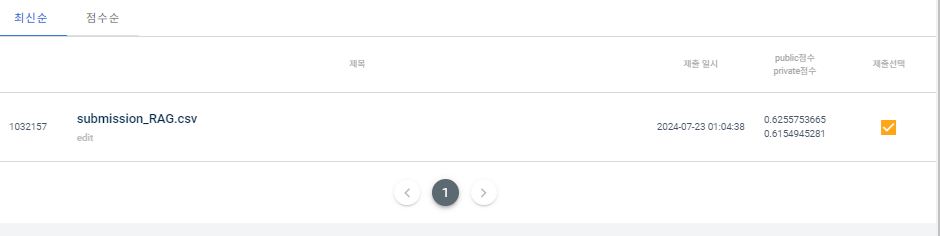